<a href="https://colab.research.google.com/github/iqbalthms/Tugas-Machine-Learning/blob/main/Week_7_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Created by : Muhammad Iqbal Thomas 1103183187

# XGBoost (eXtreme Gradient Boosting)
[Reference](https://www.kaggle.com/code/dansbecker/xgboost/notebook)

Definition
XGBoost is the leading model for working with standard tabular data (the type of data you store in Pandas DataFrames, as opposed to more exotic types of data like images and videos). XGBoost models dominate many Kaggle competitions.

To reach peak accuracy, XGBoost models require more knowledge and model tuning than techniques like Random Forest. After this tutorial, you'ill be able to

Follow the full modeling workflow with XGBoost
Fine-tune XGBoost models for optimal performance
XGBoost is an implementation of the Gradient Boosted Decision Trees algorithm (scikit-learn has another version of this algorithm, but XGBoost has some technical advantages.) What is Gradient Boosted Decision Trees? We'll walk through a diagram

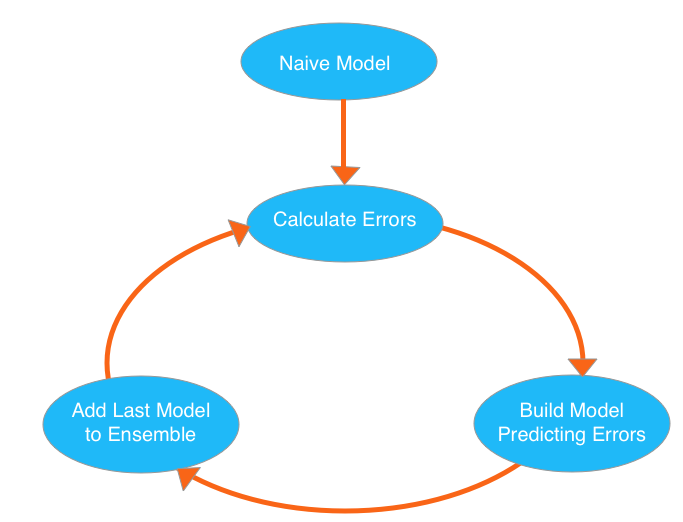

We go through cycles that repeatedly builds new models and combines them into an ensemble model. We start the cycle by calculating the errors for each observation in the dataset. We then build a new model to predict those. We add predictions from this error-predicting model to the "ensemble of models."

To make a prediction, we add the predictions from all previous models. We can use these predictions to calculate new errors, build the next model, and add it to the ensemble.

There's one piece outside that cycle. We need some base prediction to start the cycle. In practice, the initial predictions can be pretty naive. Even if it's predictions are wildly inaccurate, subsequent additions to the ensemble will address those errors.

This process may sound complicated, but the code to use it is straightforward. We'll fill in some additional explanatory details in the model tuning section below.

# Example using XGBoost

In [1]:
#Import Required Modules
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer as Imputer

from xgboost import XGBRegressor

We will start with the data pre-loaded into train_X, test_X, train_y, test_y.

In [2]:
data = pd.read_csv('train.csv')
data.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = data.SalePrice
X = data.drop(['SalePrice'], axis=1).select_dtypes(exclude=['object'])
train_X, test_X, train_y, test_y = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.25)

my_imputer = Imputer()
train_X = my_imputer.fit_transform(train_X)
test_X = my_imputer.transform(test_X)

We build and fit a model just as we would in scikit-learn.

In [3]:
my_model = XGBRegressor()
# Add silent=True to avoid printing out updates with each cycle
my_model.fit(train_X, train_y, verbose=False)

[04:58:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

We similarly evaluate a model and make predictions as we would do in scikit-learn.

In [4]:
# make predictions
predictions = my_model.predict(test_X)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, test_y)))

Mean Absolute Error : 15305.568503852739
